In [13]:
import os, sys

codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd

from plotting import plot_utils
from model_fitting import initialize_fitting 
from utils import numpy_utils, default_paths, prf_utils
from analyze_features import analyze_feature_decoding


In [15]:
which_prf_grid = 5;
models = prf_utils.get_prf_models(which_prf_grid)
prfs_use = prf_utils.get_prfs_use_decoding(which_prf_grid=which_prf_grid)
np.sum(prfs_use)

n_prfs = len(models)

x = models[:,0]*8.4; y = models[:,1]*8.4;
ecc = np.round(np.sqrt(models[:,0]**2+models[:,1]**2)*8.4, 4)
sizes = np.round(models[:,2]*8.4, 4)
angles = np.round(np.mod(np.arctan2(y,x)*180/np.pi, 360),1)

ecc_vals = np.unique(ecc)
size_vals = np.unique(sizes)
ang_vals = np.unique(angles)
n_ecc = len(ecc_vals);
n_sizes = len(size_vals)
n_angles = len(ang_vals)

counts_each_ecc = np.array([np.sum(ecc==ecc_vals[ee]) for ee in range(n_ecc)])
ecc_use = counts_each_ecc==(n_angles*n_sizes)
n_ecc_use = np.sum(ecc_use)
ecc_vals_use = ecc_vals[ecc_use]

prfs_use = np.isin(ecc,ecc_vals_use)
np.sum(prfs_use)

1280

In [22]:
size_use = size_vals[5]
size_use

1.4763

In [16]:
counts_filename = os.path.join(default_paths.stim_labels_root, 'Highlevel_counts_all.npy')
counts = np.load(counts_filename, allow_pickle=True).item()


In [17]:
sub_ind = 9;
counts_categ = counts['counts_categ'][sub_ind,:,:]
categ_names = counts['categ_names']
n_categ = len(categ_names)

In [141]:
coco_counts_filename = os.path.join(default_paths.stim_labels_root, 'Coco_counts_all.npy')
coco_counts = np.load(coco_counts_filename, allow_pickle=True).item()
counts_coco_things = coco_counts['counts_coco_things'][sub_ind,:]
counts_coco_stuff = coco_counts['counts_coco_stuff'][sub_ind,:]


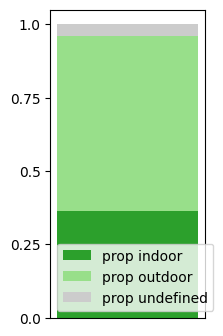

In [126]:
colors = cm.tab20(np.linspace(0,1,20))[[4,5,5],:]
colors[2,:] = [0.8, 0.8, 0.8, 1]

counts_wholeimage = [np.unique(counts_categ[:,ci])[0] for ci in [6,7]]
n_images =50000
counts_rem = n_images - np.sum(counts_wholeimage)
categ_names_wholeimage = [categ_names[ci]  for ci in [6,7]]
plt.figure(figsize=(2,4))
plt.bar(0,counts_wholeimage[0],color=colors[0,:])
plt.bar(0,counts_wholeimage[1], bottom=counts_wholeimage[0],color=colors[1,:])
plt.bar(0,counts_rem, bottom=counts_wholeimage[0]+counts_wholeimage[1],color=colors[2,:])
plt.xticks([])
plt.yticks(np.linspace(0,50000,5), np.linspace(0,1,5));
plt.legend(['prop %s'%cat for cat in categ_names_wholeimage] + ['prop undefined'])

In [67]:
categ_names_wholeimage

['indoor', 'outdoor']

In [37]:
categ_plot = [0,1,2,3,4,5]

In [18]:
counts_binary = counts['counts_binary'][sub_ind,:,:,:]
n_images = int(np.sum(counts_binary[0,0,:]))
n_images
axis_names = counts['axis_names']
n_axes = len(axis_names)

In [19]:
counts['counts_binary'][sub_ind,:,:,:].shape

(1456, 6, 3)

In [20]:
np.any(np.isnan(counts['counts_binary'][:,2,:]))

False

In [21]:
axis_names

['face-building',
 'face-none',
 'building-none',
 'animate-inanimate',
 'small-large',
 'indoor-outdoor']

In [94]:
[(np.arange(4)+ii).astype(int) for ii in [1,1,5,5,9,9]]


[array([1, 2, 3, 4]),
 array([1, 2, 3, 4]),
 array([5, 6, 7, 8]),
 array([5, 6, 7, 8]),
 array([ 9, 10, 11, 12]),
 array([ 9, 10, 11, 12])]

In [110]:
colors = np.concatenate([np.flipud(cm.Purples(np.linspace(0,1,5)))[1:3,:], \
                        np.flipud(cm.Reds(np.linspace(0,1,5)))[1:3,:], \
                        np.flipud(cm.Blues(np.linspace(0,1,5)))[1:3,:]])

In [124]:

# colors = cm.tab10(np.linspace(0,1,10))[[4,7,3,6,9,0],:]
# colors[[1,3,5],:] = 0.6
# colors[3,:] = 0.8
# colors[5,:] = 0.8

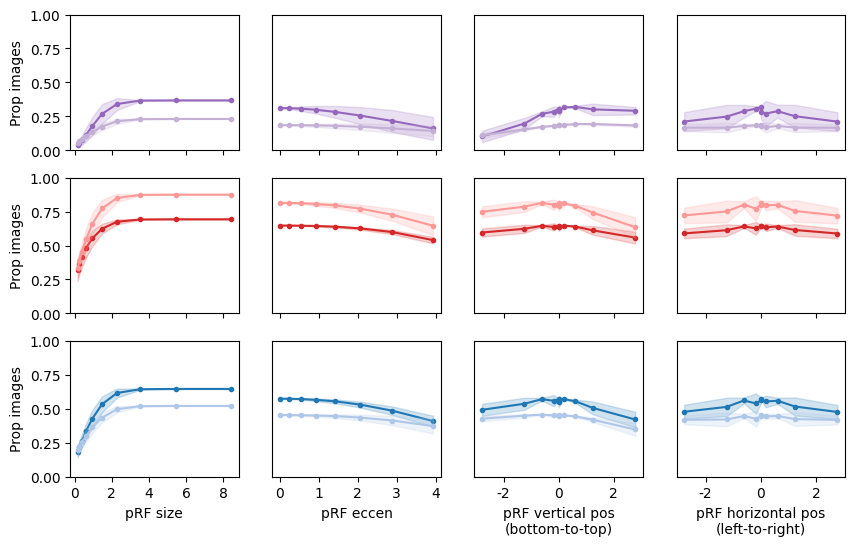

In [137]:
# colors = cm.tab20(np.linspace(0,1,20))[[8,14, 6,7, 0,1, 4,5],:]
colors = cm.tab20(np.linspace(0,1,20))[[8,9, 6,7, 0,1, 4,5],:]

n_bins=10; linear_bins=False; 

plt.figure(figsize=(10,6))
pi=0

npx = int(len(categ_plot)/2)

pinds = [(np.arange(4)+ii).astype(int) for ii in [1,1,5,5,9,9]]

xticks = [[0,2,4,6,8], [0,1,2,3,4], [-2, 0, 2], [-2, 0, 2]]


for ci in categ_plot:
    
    vals = counts_categ[prfs_use,ci]
    vals /= n_images
    
    pi = pinds[ci][0]
    plt.subplot(npx,4,pi)
    
    x_vals = sizes[prfs_use]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 1])
    if ci==categ_plot[-1]:
        plt.xlabel('pRF size')
        plt.xticks(xticks[0],xticks[0])
    else:
        plt.xticks(xticks[0],[])
    
    plt.ylabel('Prop images')
    
    pi = pinds[ci][1]
    plt.subplot(npx,4,pi)
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = counts_categ[prf_inds,ci]
    vals /= n_images
    x_vals = ecc[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 1])
    if ci==categ_plot[-1]:
        plt.xlabel('pRF eccen')
        plt.xticks(xticks[1],xticks[1])
    else:
        plt.xticks(xticks[1],[])
    plt.yticks([])
    
        
    pi = pinds[ci][2]
    plt.subplot(npx,4,pi)
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = counts_categ[prf_inds,ci]
    vals /= n_images
    x_vals = y[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=False)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 1])
    
    if ci==categ_plot[-1]:
        plt.xlabel('pRF vertical pos\n(bottom-to-top)')
        plt.xticks(xticks[2],xticks[2])
    else:
        plt.xticks(xticks[2],[])
    plt.yticks([])
    
    
    pi = pinds[ci][3]
    plt.subplot(npx,4,pi)
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = counts_categ[prf_inds,ci]
    vals /= n_images
    x_vals = x[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=False)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 1])
    if ci==categ_plot[-1]:
        plt.xlabel('pRF horizontal pos\n(left-to-right)')
        plt.xticks(xticks[3],xticks[3])
    else:
        plt.xticks(xticks[3],[])
    plt.yticks([])
    

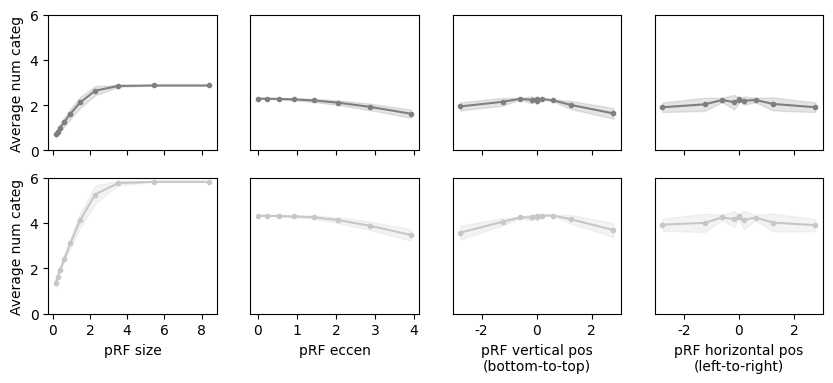

In [147]:
colors = cm.tab20(np.linspace(0,1,20))[[14,15],:]

n_bins=10; linear_bins=False; 

plt.figure(figsize=(10,6))
pi=0

npx = int(len(categ_plot)/2)

xticks = [[0,2,4,6,8], [0,1,2,3,4], [-2, 0, 2], [-2, 0, 2]]

ylims = [0,6]

for ci, count_vals in enumerate([counts_coco_things, counts_coco_stuff]):
    
    vals = count_vals[prfs_use]
    vals /= n_images
    
    pi +=1
    plt.subplot(npx,4,pi)
    
    x_vals = sizes[prfs_use]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim(ylims)
    if ci==1:
        plt.xlabel('pRF size')
        plt.xticks(xticks[0],xticks[0])
    else:
        plt.xticks(xticks[0],[])
    
    plt.ylabel('Average num categ')
    
    pi +=1
    plt.subplot(npx,4,pi)
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = count_vals[prf_inds]
    vals /= n_images
    x_vals = ecc[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim(ylims)
    if ci==1:
        plt.xlabel('pRF eccen')
        plt.xticks(xticks[1],xticks[1])
    else:
        plt.xticks(xticks[1],[])
    plt.yticks([])
    
        
    pi +=1
    plt.subplot(npx,4,pi)
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = count_vals[prf_inds]
    vals /= n_images
    x_vals = y[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=False)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim(ylims)
    
    if ci==1:
        plt.xlabel('pRF vertical pos\n(bottom-to-top)')
        plt.xticks(xticks[2],xticks[2])
    else:
        plt.xticks(xticks[2],[])
    plt.yticks([])
    
    
    pi +=1
    plt.subplot(npx,4,pi)
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = count_vals[prf_inds]
    vals /= n_images
    x_vals = x[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=False)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim(ylims)
    if ci==1:
        plt.xlabel('pRF horizontal pos\n(left-to-right)')
        plt.xticks(xticks[3],xticks[3])
    else:
        plt.xticks(xticks[3],[])
    plt.yticks([])
    

In [135]:
categ_plot[-1]

5

Text(0.5, 0.98, 'n trials in category')

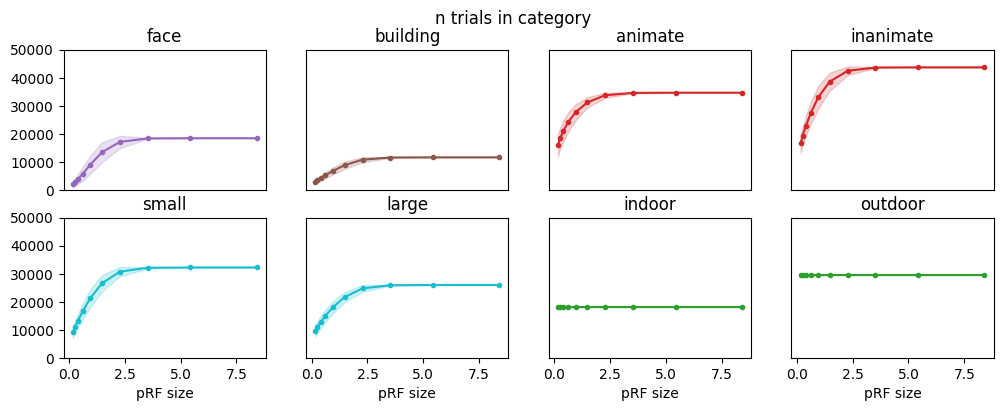

In [72]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,5,3,3,9,9,2,2],:]

plt.figure(figsize=(12,4))
pi=0
# for ci in categ_plot:
for ci in range(n_categ):
    
    vals = counts_categ[prfs_use,ci]
    
    pi+=1
    plt.subplot(2,4,pi)
    
    x_vals = sizes[prfs_use]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 50000])
    if ci>3:
        plt.xlabel('pRF size')
    else:
        plt.xticks([])
    if np.mod(ci,4)!=0:
        plt.yticks([])
        
    plt.title(categ_names[ci])
    
plt.suptitle('n trials in category')

Text(0.5, 0.98, 'n trials in category')

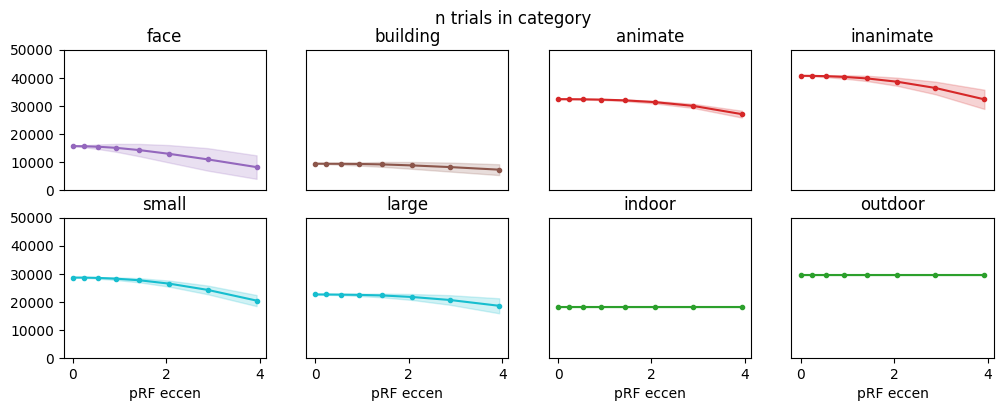

In [26]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,5,3,3,9,9,2,2],:]

plt.figure(figsize=(12,4))
for ci in range(n_categ):
    
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = counts_categ[prf_inds,ci]
    plt.subplot(2,4,ci+1)
    
    x_vals = ecc[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 50000])
    if ci>3:
        plt.xlabel('pRF eccen')
    else:
        plt.xticks([])
    if np.mod(ci,4)!=0:
        plt.yticks([])
        
    plt.title(categ_names[ci])
    
plt.suptitle('n trials in category')

Text(0.5, 0.98, 'n trials in category')

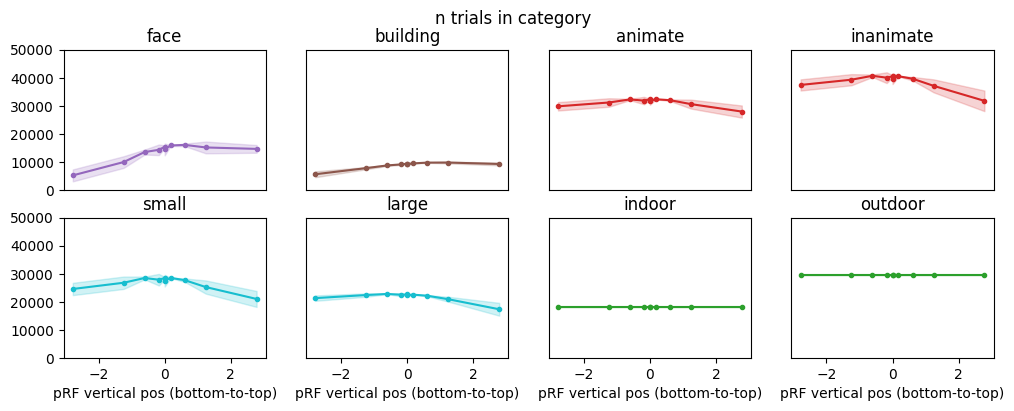

In [36]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,5,3,3,9,9,2,2],:]

plt.figure(figsize=(12,4))
for ci in range(n_categ):
    
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = counts_categ[prf_inds,ci]
    plt.subplot(2,4,ci+1)
    
    x_vals = y[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=False)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 50000])
    if ci>3:
        plt.xlabel('pRF vertical pos (bottom-to-top)')
    else:
        plt.xticks([])
    if np.mod(ci,4)!=0:
        plt.yticks([])
        
    plt.title(categ_names[ci])
    
plt.suptitle('n trials in category')

Text(0.5, 0.98, 'n trials in category')

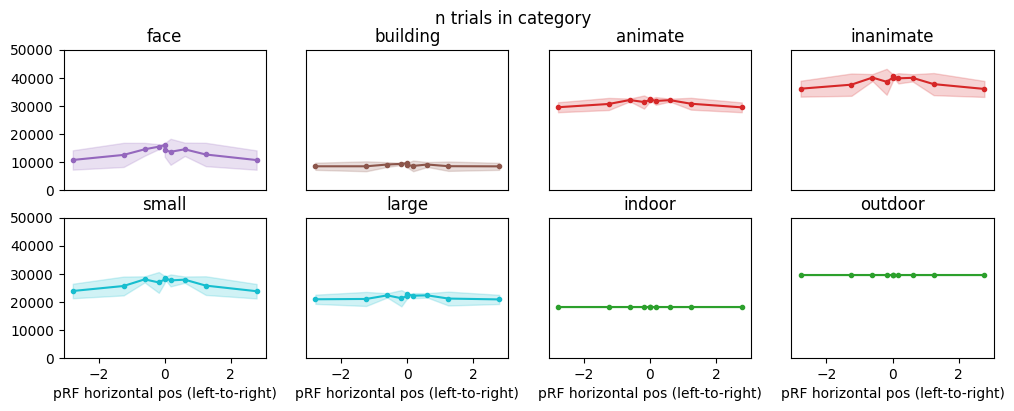

In [28]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,5,3,3,9,9,2,2],:]

plt.figure(figsize=(12,4))
for ci in range(n_categ):
    
    prf_inds = (prfs_use & (sizes==size_use))
    
    vals = counts_categ[prf_inds,ci]
    plt.subplot(2,4,ci+1)
    
    x_vals = x[prf_inds]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=False)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ci,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ci,:], facecolor=colors[ci,:], zorder=10)

    plt.ylim([0, 50000])
    if ci>3:
        plt.xlabel('pRF horizontal pos (left-to-right)')
    else:
        plt.xticks([])
    if np.mod(ci,4)!=0:
        plt.yticks([])
        
    plt.title(categ_names[ci])
    
plt.suptitle('n trials in category')

In [18]:
for si in np.arange(10):

    size_use = size_vals[si]
    
    print(size_use)

    prfs_use_decoding = (sizes>=size_use) & np.isin(ecc, ecc_vals_use)

    n_eachlabel = np.min(counts_binary[prfs_use_decoding,:,0:2], axis=2)
    print(np.min(n_eachlabel, axis=0))

0.168
[    0.    92.     0.     0.     0. 17209.]
0.2595
[  110.   118.  1155.  5103.  3060. 17209.]
0.4007
[  185.   199.  1369.  5103.  3629. 17209.]
0.6189
[  303.   336.  1708.  5103.  4500. 17209.]
0.9559
[  671.   753.  2363.  5103.  6115. 17209.]
1.4763
[ 1803.  2070.  3603.  5103.  8687. 17209.]
2.2801
[ 5531.  7246.  6568.  5103. 10719. 17209.]
3.5215
[ 7039. 17427. 10658.  5103. 10719. 17209.]
5.4388
[ 7312. 18402. 11573.  5103. 10726. 17209.]
8.4
[ 7312. 18402. 11573.  5103. 10726. 17209.]


1803.0
2070.0
3603.0
7040.0
8687.0
17209.0


Text(0.5, 0.98, 'min n trials available for decoding, each class')

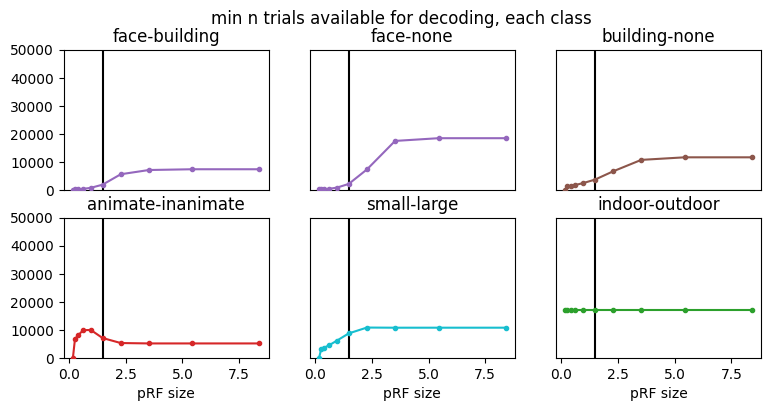

In [11]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,4,5,3,9,2],:]

plt.figure(figsize=(9,4))
for ai in range(n_axes):
    vals = np.min(counts_binary[prfs_use,ai,0:2], axis=1)
    # vals /= n_images
    plt.subplot(2,3,ai+1)
    
    x_vals = sizes[prfs_use]
    
    xbinned = np.unique(x_vals)
    ybinned = np.array([np.min(vals[x_vals==xb]) for xb in xbinned])
      
    print(ybinned[5])
    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    
    # plt.ylim([0, 1])
    plt.ylim([0,50000])
    if ai>2:
        plt.xlabel('pRF size')
    else:
        plt.xticks([])
    if np.mod(ai,3)!=0:
        plt.yticks([])
    plt.title(axis_names[ai])
    
    plt.axvline(size_vals[5], color='k')
    
plt.suptitle('min n trials available for decoding, each class')

Text(0.5, 0.98, 'prop trials available for decoding, each class')

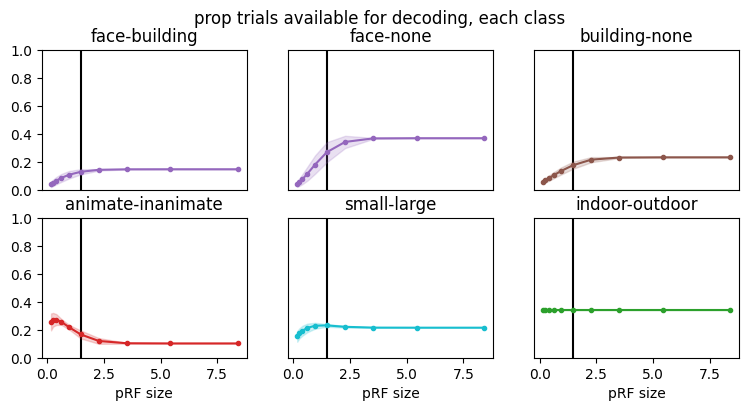

In [19]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,4,5,3,9,2],:]

plt.figure(figsize=(9,4))
for ai in range(n_axes):
    vals = np.min(counts_binary[prfs_use,ai,0:2], axis=1)
    vals /= n_images
    plt.subplot(2,3,ai+1)
    
    x_vals = sizes[prfs_use]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    plt.ylim([0, 1])
    if ai>2:
        plt.xlabel('pRF size')
    else:
        plt.xticks([])
    if np.mod(ai,3)!=0:
        plt.yticks([])
    plt.title(axis_names[ai])
    
    plt.axvline(size_vals[5], color='k')
    
plt.suptitle('prop trials available for decoding, each class')

In [111]:
size_vals

array([0.168 , 0.2595, 0.4007, 0.6189, 0.9559, 1.4763, 2.2801, 3.5215,
       5.4388, 8.4   ], dtype=float32)

Text(0.5, 0.98, 'prop trials that are ambiguous in binary labeling scheme')

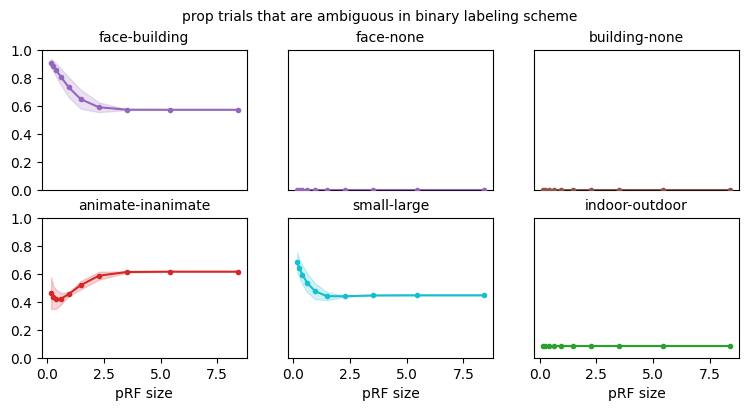

In [106]:
n_bins=10; linear_bins=False; 
colors = cm.tab10(np.linspace(0,1,10))[[4,4,5,3,9,2],:]

plt.figure(figsize=(9,4))
for ai in range(n_axes):
    vals = counts_binary[prfs_use,ai,2]
    vals /= n_images
    plt.subplot(2,3,ai+1)
    
    x_vals = sizes[prfs_use]
    
    xbinned, ybinned, ystd = numpy_utils.bin_ydata_by_xdata(x_vals, vals, n_bins=n_bins, \
                                            linear_bins=linear_bins, return_std=True, \
                                                            use_unique=True)    
    plt.plot(xbinned, ybinned, '.-',color=colors[ai,:] ,zorder=10)
    plt.fill_between(xbinned, ybinned-ystd, ybinned+ystd,
            alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

    plt.ylim([0, 1])
    if ai>2:
        plt.xlabel('pRF size')
    else:
        plt.xticks([])
    if np.mod(ai,3)!=0:
        plt.yticks([])
    plt.title(axis_names[ai])
    
plt.suptitle('prop trials that are ambiguous in binary labeling scheme')